# Convolutional Neural Networks (CNN)

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('data/train.csv')

In [3]:
train.shape

(42000, 785)

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test=pd.read_csv('data/test.csv')

In [6]:
test.shape

(28000, 784)

In [7]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
Y_train = train['label']

In [19]:
Y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [10]:
X_train = train.drop(labels = ['label'],axis = 1)

In [11]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

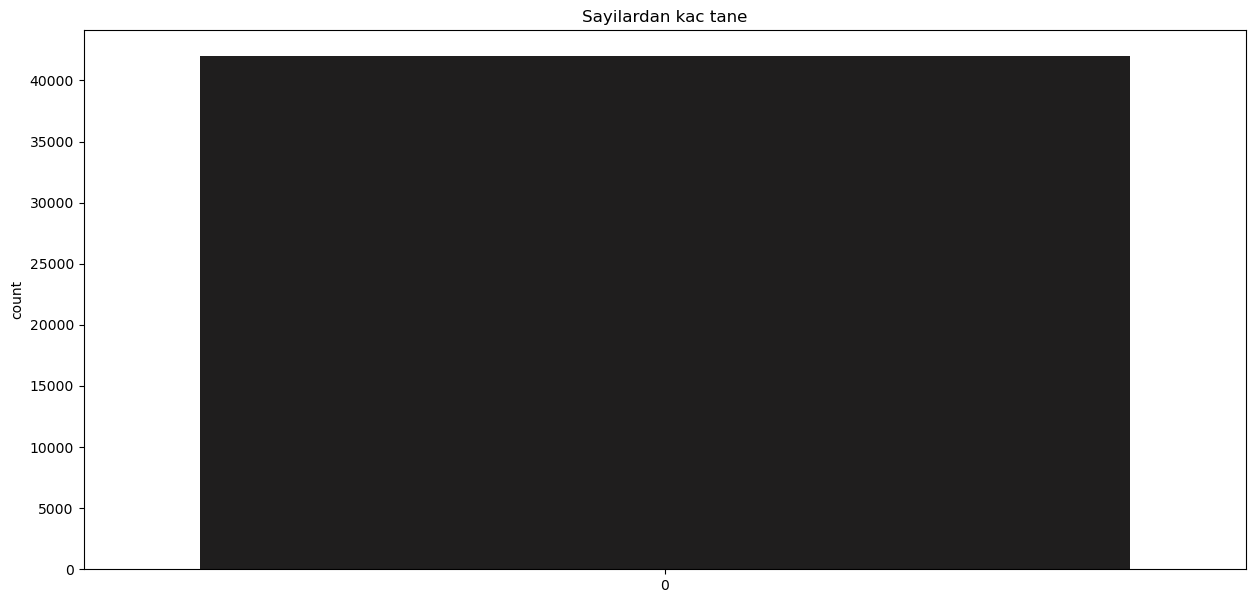

In [23]:
plt.figure(figsize=(15,7))
sns.countplot(Y_train,palette='icefire')
plt.title('Sayilardan kac tane')
Y_train.value_counts()


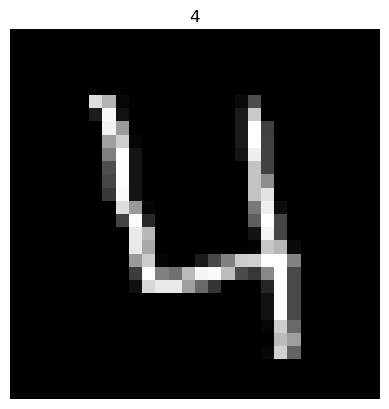

In [25]:
img = X_train.iloc[3].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

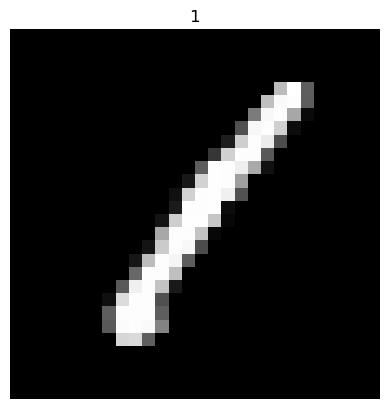

In [26]:
# plot some samples
img = X_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

<a id="2"></a>
## Normalizasyon, Yeniden Şekillendirme ve Etiket Kodlama
* Normalizasyon
    * Aydınlatma farklılıklarının etkisini azaltmak için bir gri tonlama normalizasyonu gerçekleştiriyoruz.
    * Normalizasyon gerçekleştirirsek, CNN daha hızlı çalışır.
* Yeniden Şekillendirme
    * Eğitim ve test görüntüleri (28 x 28)
    * Tüm verileri 28x28x1 3B matrislere yeniden şekillendiriyoruz.
    * Keras'ın kanallara karşılık gelen ek bir boyuta ihtiyacı vardır. Görüntülerimiz gri tonlamalı olduğundan yalnızca bir kanal kullanılır.
* Etiket Kodlama
    * Etiketleri tek sıcak vektörlere kodlayın
        * 2 => [0,0,1,0,0,0,0,0,0,0]
        * 4 => [0,0,0,0,1,0,0,0,0,0]

### Normalizasyon (Normalization)
Görüntülerdeki piksel değerlerinin genellikle 0 ile 255 arasında bir aralıkta bulunduğunu göz önünde bulundurursak, normalizasyon işlemi bu piksel değerlerini belirli bir aralığa ölçeklendirerek veya dönüştürerek gerçekleştirilir. Bu örnekte, gri tonlamalı bir görüntüyü ele aldığımız için, piksel değerlerini 0 ile 1 arasında ölçeklendirme adımını uyguluyoruz. Bu, aydınlatma farklılıklarının etkisini azaltmaya ve modelin daha iyi öğrenmesini sağlamaya yardımcı olur.


In [27]:
X_train = X_train / 255.0
test = test / 255.0

In [28]:
X_train.shape

(42000, 784)

In [29]:
test.shape

(28000, 784)

### Yeniden Şekillendirme (Reshape)
Veri hazırlığı sırasında, veri setindeki görüntülerin boyutlarını uygun bir şekle getirmek önemlidir. Bu örnekte, 28x28 piksel boyutunda olan her bir görüntüyü 28x28x1(1 burada Gray-Scale olduğu anlamına gelir örneğin 3 olsa rgb) boyutunda bir 3B matrise dönüştürüyoruz. Bu, Keras gibi derin öğrenme kütüphanelerinin giriş verilerini kabul etme şeklini karşılamak için gereklidir. Gri tonlamalı görüntüler yalnızca bir kanal içerdiğinden, 1 kanallı bir görüntü oluşturulur.

Örneğin, X_train veri kümesi bir 2B dizidir (örneğin, (m, n), burada m örnek sayısı ve n özellik sayısıdır). Ancak, bu örnekte, 2B diziyi bir 4B dizide (örneğin, (m, 28, 28, 1)) yeniden şekillendiriyoruz. Burada -1, m örnek sayısının otomatik olarak hesaplanmasını sağlar. Yani, Numpy otomatik olarak m'yi hesaplar ve uygun boyutları oluşturur.

Bu şekilde, veri setimizin boyutunu değiştirebilirken, belirli bir boyutu önceden belirtmemiz gerekmez. Numpy, bu boyutu otomatik olarak hesaplar ve uygun bir şekilde yeniden şekillendirme işlemi gerçekleştirir.

In [30]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

### Etiket Kodlama (Label Encoding)
Modelimizi eğitirken, genellikle sınıflandırma problemlerinde hedef değişkenlerimizi kategorik olarak kodlamamız gerekir. Bu örnekte, etiketleri (sınıf bilgilerini) tek sıcak vektörlere dönüştürüyoruz. Tek sıcak kodlama, sınıf etiketlerini anlamlı bir şekilde kodlamak için kullanılır. Her bir sınıf için bir vektör oluşturulur ve ilgili sınıfın endeksi 1, diğer endeksler ise 0 olur. Bu, sınıf bilgilerini modelin daha iyi anlamasına ve işlemesine yardımcı olur.

In [31]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

In [32]:
Y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

### Train, Test, Val split
Eğitim Seti (Train Set): Eğitim seti, modelin öğrenmesi ve parametrelerini ayarlaması için kullanılan veri kümesidir. Model, eğitim setindeki özelliklerle birlikte etiketleri (gerçek çıktıları) kullanarak öğrenir. Eğitim seti, genellikle modelin çoğunlukla %70-80'ini oluşturur ve modelin en iyi şekilde öğrenmesini sağlamak için kullanılır.

Test Seti (Test Set): Test seti, eğitim sürecinde modelin performansını değerlendirmek için kullanılan ayrılmış veri kümesidir. Model, eğitim setinde öğrenilen bilgileri kullanarak test setindeki verilerle tahminler yapar. Bu tahminler, test setindeki gerçek etiketlerle karşılaştırılarak modelin performansı değerlendirilir. Test seti, modelin eğitilmediği ve görmediği verilerle test edildiği için, modelin gerçek dünya verilerine ne kadar iyi genelleştirme yapabildiğini gösterir.

Doğrulama Seti (Validation Set): Doğrulama seti, modelin eğitim sırasında aşırı uyumu (overfitting) önlemek ve modelin hiperparametrelerini ayarlamak için kullanılan bir veri kümesidir. Model, eğitim setinde öğrenirken, doğrulama setindeki verilerle doğruluğunu değerlendirir ve hiperparametrelerin ayarlanmasına yardımcı olur. Doğrulama seti, eğitim setinden farklıdır ve modelin genelleştirilmiş performansını daha bağımsız bir şekilde değerlendirmeye yardımcı olur.

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

In [36]:
X_train.shape

(37800, 28, 28, 1)

In [37]:
X_val.shape

(4200, 28, 28, 1)

In [38]:
Y_train.shape

(37800, 10)

In [39]:
Y_val.shape

(4200, 10)

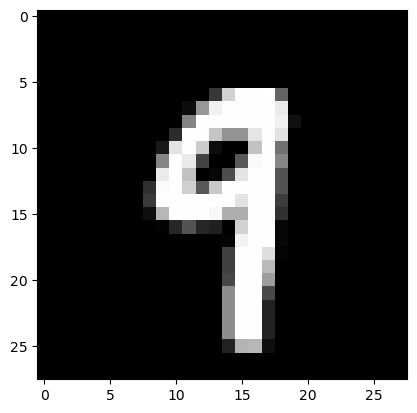

In [40]:
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

<a id="4"></a>
## Convolutional Neural Network 
* <a href="https://ibb.co/kV1j9p"><img src="https://preview.ibb.co/nRkBpp/gec2.jpg" alt="gec2" border="0"></a>

CNN'ler, özellikle görsel veri işleme alanında başarılı olan derin öğrenme modellerinden biridir. İşte CNN'in temel özellikleri:

Evrişim (Convolution): CNN'ler, evrişim adı verilen bir işlemi kullanarak giriş verisinin özelliklerini öğrenir. Evrişim işlemi, filtrelerin(filtre örneğin bir kedi resminin kuyruğu kulağı gibi verilerin ayırt edilmesini sağlar) giriş verisi üzerinde kaydırılması ve farklı özelliklerin vurgulanması veya çıkarılması için kullanılır. Bu sayede, verinin lokal özellikleri öğrenilebilir ve daha karmaşık yapılar tanınabilir hale gelir.

Pooling (Havuzlama): CNN'lerde evrişim işleminden sonra sıklıkla havuzlama (pooling) işlemi uygulanır. Havuzlama, giriş verisinin boyutunu küçültmek ve özellikleri daha genelleştirmek için kullanılır. Genellikle en yaygın kullanılan havuzlama türü, maksimum havuzlama veya ortalama havuzlamadır.(Örneğin kulağı görebileceğim en büyük değeri getiriyor)

Derinlik (Depth): CNN'ler, çok katmanlı bir yapıya sahiptir. Her katman, önceki katmanın çıktılarını giriş olarak alır ve daha karmaşık özellikleri öğrenmek için daha fazla filtre veya öznitelik haritası içerir. Bu, verinin daha yüksek seviyeli özelliklerini öğrenmek için modelin derinlemesine gidebilmesini sağlar.

Flatten(Düzleştirme): 3x3 matrisi uzatıp 9x1 hale getirme işlemi ANN kullanmak için gerekliyor 

Tam Bağlantı (Fully Connected Layers): CNN'ler genellikle evrişim ve havuzlama katmanlarından sonra tam bağlantı (fully connected) katmanları ile sonlanır. Bu katmanlar, özellikleri sınıflara doğrudan bağlayarak sınıflandırma veya regresyon gibi görevler için kullanılır.

CNN'ler, özellikle görüntü sınıflandırma, nesne tanıma, yüz tanıma gibi görevlerde büyük başarı elde etmiştir. Ayrıca, dil işleme, tıbbi görüntüleme ve otonom sürüş gibi alanlarda da başarılı bir şekilde kullanılmaktadır.

**CNN de 2 şey öğreniyoruz bunlardan ilki artifical neural networkte bulunan weight bias kısmı ikincisi ise filtreleri öğreniyoruz filtrelerimin nasıl olacağı öğreniliyor!!**

### Evrişim İşlemi Nedir?

* Bizim bir görüntümüz ve özellik tanıyıcı (3x3) var.
* Özellik tanıyıcısı mutlaka 3x3 matris olmak zorunda değil. 5x5 veya 7x7 olabilir.
* Özellik tanıyıcı = çekirdek = filtre
* Özellik tanıyıcı, kenarlar veya çıkıntılı şekiller gibi özellikleri algılar. Örneğin, girişimiz bir köpek ise, özellik tanıyıcısı köpeğin kulağı veya kuyruğu gibi özellikleri algılayabilir.(Önemli!!!!)
* Özellik haritası = conv(giriş görüntüsü, özellik tanıyıcı). Matrislerin eleman bazında çarpımı.
* Özellik haritası = evrişilmiş özellik
* Adım (Stride) = giriş görüntüsünde gezinme.(Kaç atlayarak gezecek)
* Görüntünün boyutunu küçültüyoruz. Bu, kodun daha hızlı çalışmasını sağlamak için önemlidir. Ancak, bilgi kaybediyoruz.
* Çoklu özellik haritası oluşturuyoruz çünkü çoklu özellik tanıyıcıları (filtreleri) kullanıyoruz.
* Gimp'e bakalım. Kenar algılama: [0,10,0],[10,-4,10],[0,10,0]
* <a href="https://imgbb.com/"><img src="https://image.ibb.co/m4FQC9/gec.jpg" alt="gec" border="0"></a>
* Evrişim katmanından sonra ReLU kullanıyoruz, doğrusal olmayanlığı artırıyoruz. Çünkü görüntüler doğrusal değildir.(- ve <0 olanlar 0 a diğerleri kendi değerine )
* <a href="https://ibb.co/mVZih9"><img src="https://preview.ibb.co/gbcQvU/RELU.jpg" alt="RELU" border="0"></a>

<a id="6"></a>
### Same Padding
* Evrişim katmanları, bir sinir ağındaki temel yapı taşlarından biridir. Bu katmanlar, giriş verisinden farklı özelliklerin çıkarılmasına yardımcı olur. Ancak, evrişim işlemi uygulandıkça, verinin boyutu genellikle küçülür. Bu durumda, erken katmanlarda, yani ağın başlangıcında, orijinal giriş verisinin önemli bir kısmını korumak istiyoruz. Çünkü bu katmanlarda, verinin temel özellikleri, yani kenarlar, köşeler, veya basit desenler gibi düşük seviyeli özellikler, öğrenilmeye çalışılır.

* Same Padding (Aynı Dolgu), bu işlemde bize yardımcı olur. Bu, giriş verisinin kenarlarına sıfırlar ekleyerek veya dolgu yaparak yapılır. Böylece, evrişim işlemi uygulandıktan sonra, çıkış boyutu giriş boyutuyla aynı kalır. Bu da demek oluyor ki, evrişim katmanlarından geçtikten sonra bile, verinin boyutu aynı kalır ve bu da bilgi kaybını minimize etmemize yardımcı olur.

* Yani, evrişim katmanlarını uyguladığımızda, verinin boyutu hızlıca küçülmesin, böylece erken katmanlarda önemli bilgiler kaybolmasın diye Same Padding kullanırız. Bu sayede, ağımız daha iyi öğrenebilir ve daha iyi sonuçlar elde edebiliriz.
* <a href="https://ibb.co/jUPkUp"><img src="https://preview.ibb.co/noH5Up/padding.jpg" alt="padding" border="0"></a>

### Max Pooling Nedir?

* Max Pooling, aşağı örnekleme veya alt örnekleme yapar. (Parametre sayısını azaltır)
* Özellikleri, ölçek veya yönelim değişikliklerine karşı duyarsız hale getirir.
* Ağdaki parametre sayısını ve hesaplama miktarını azaltır, bu da aşırı uydurmayı kontrol etmemize yardımcı olur.
* <a href="https://ibb.co/ckTjN9"><img src="https://preview.ibb.co/gsNYFU/maxpool.jpg" alt="maxpool" border="0"></a>

Max Pooling, evrişimli sinir ağlarında sıklıkla kullanılan bir tekniktir. Bu teknik, özellik haritasındaki (feature map) bilgi miktarını azaltarak ağın daha hızlı çalışmasını sağlar. Örneğin, 2x2 boyutunda bir pencereyi özelleştirip bu pencerenin en büyük değerini alarak çalışır. Bu şekilde, verinin boyutunu küçültür ve özellikleri daha genelleştirir, böylece modelin öğrenmesini kolaylaştırır. Ayrıca, aşırı uyumu (overfitting) kontrol etmek için de kullanılır, çünkü daha az parametre ve hesaplama kullanarak ağın genelleştirilmesini sağlar.

### Flattening Nedir?

* Flattening, bir veri yapılarını düzleştirme işlemidir.
* Özellik haritasını (feature map) 2B veya 3B tensörden (matris veya küp) 1B tensöre (vektör) dönüştürür.
* Bu işlem, evrişimli sinir ağlarında sıkça kullanılır.
* Özellik haritasındaki her piksel veya eleman, birbirini takip eden bir sıralama içinde tek bir satıra yerleştirilir.
* Bu, ağın tam bağlantılı (fully connected) katmanlarına giriş yapılabilmesi için gereklidir.
* <a href="https://imgbb.com/"><img src="https://image.ibb.co/c7eVvU/flattenigng.jpg" alt="flattenigng" border="0"></a>

Flattening işlemi, evrişimli sinir ağlarında özellik haritasını düzleştirerek, sonraki tam bağlantılı (fully connected) katmanlara uygun bir formata dönüştürmek için kullanılır. Özellik haritasındaki her piksel veya eleman, tek bir satıra yerleştirilir. Böylece, ağın çıktılarını almak için gerekli olan tek boyutlu bir vektör elde edilir. Bu, evrişimli katmanlardan elde edilen özellikleri tam bağlantılı katmanlara iletebilmemizi sağlar.

### Tam Bağlantı Nedir?

* Tam Bağlantı, bir katmandaki her nöronun önceki katmandaki tüm aktivasyonlarla bağlantıya sahip olduğu bir yapıdır.
* Bu yapı, Yapay Sinir Ağları'nda (Artificial Neural Networks) sıklıkla kullanılır.
* Her nöron, önceki katmandaki tüm nöronlarla bağlantı kurar, bu da ağın tam bağlantılı olduğu anlamına gelir.
* Her bir bağlantı, bir ağırlıkla çarpılarak katmanlar arasındaki bilgi transferini sağlar.
* Tam bağlantılı katmanlar, evrişimli ve havuzlama katmanlarının ardından gelir ve ağın çıktısını oluşturur.
* <a href="https://ibb.co/hsS14p"><img src="https://preview.ibb.co/evzsAU/fullyc.jpg" alt="fullyc" border="0"></a>

Tam Bağlantı yapısı, her bir nöronun önceki katmandaki tüm aktivasyonlarla bağlantı kurduğu bir yapıdır. Bu, ağın her bir girişten çıktıya kadar tamamen bağlantılı olduğu anlamına gelir. Her bir bağlantı, bir ağırlıkla çarpılarak ve uygun bir aktivasyon fonksiyonuna geçirilerek bilgiyi aktarır. Bu yapı, ağın daha karmaşık ilişkileri öğrenmesine ve çeşitli türdeki veri kümelerinde etkili olmasına olanak tanır. Tam bağlantılı katmanlar, ağın önceki katmanlarından gelen özellikleri bir araya getirerek son çıktıyı oluşturur.

### Keras Uygulaması

### Model Oluşturma

* Modelimizi oluşturmak için belirli bir mimari kullanıyoruz: evrişim => maksimum havuzlama => dropout => evrişim => maksimum havuzlama => dropout => tam bağlantılı (2 katman).
* Dropout: Dropout, eğitim sırasında rastgele seçilen nöronların dikkate alınmadığı bir tekniktir. Bu, aşırı uydurmayı (overfitting) azaltmaya ve daha genelleştirilmiş bir model elde etmeye yardımcı olur.
* <a href="https://ibb.co/jGcvVU"><img src="https://preview.ibb.co/e7yPPp/dropout.jpg" alt="dropout" border="0"></a>

Bu modelde, evrişim katmanları ile özelliklerin çıkarılması ve önemli bilgilerin vurgulanması sağlanır. Maksimum havuzlama katmanları, boyutu küçültür ve özellikleri daha genelleştirir. Dropout katmanları, aşırı uydurmayı kontrol etmek için kullanılır. Son olarak, tam bağlantılı katmanlar, ağın çıktısını oluşturur ve sınıflandırma işlemini gerçekleştirir. Bu mimari, genellikle evrişimli sinir ağlarında sınıflandırma problemleri için etkili bir şekilde kullanılır ve iyi bir performans sağlar.

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential() # squential model olusturma bir yapıdır
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1))) # 8 tane 5x5 lik kernel olusturuldu
model.add(MaxPool2D(pool_size=(2,2))) # maxpooling yapildi
model.add(Dropout(0.25)) # overfitting i onlemek icin dropout eklendi
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu')) # 16 tane 3x3 luk kernel olusturuldu
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) # maxpooling yapildi
model.add(Dropout(0.25)) # overfitting i onlemek icin dropout eklendi
model.add(Flatten()) # 1D array a cevirme(düzlestirme)
model.add(Dense(256, activation = "relu")) # 256 nöronlu bir katman eklendi
model.add(Dropout(0.5)) # overfitting i onlemek icin dropout eklendi
model.add(Dense(10, activation = "softmax")) # 10 nöronlu bir katman eklendi

### Parametreler

1. **Filters (Filtreler)**: Filtreler, bir görüntüde belirli özellikleri bulmaya yarar. Mesela bir filtre, kenarları veya desenleri tanımak için kullanılır. Burada 8 ve 16 filtre kullanıyoruz, bu da demek oluyor ki her bir özellik için 8 veya 16 tane özel filtre oluşturulacak.

2. **Pool Size (Havuz Boyutu)**: Havuzlama, bir bölgedeki (örneğin, 2x2) en büyük piksel değerini alarak görüntüyü küçültmeye yarar. Bu da modelin daha az parametreyle daha iyi öğrenmesini sağlar.

3. **Dropout Oranı**: Dropout, aşırı uyumu (overfitting) önlemek için kullanılan bir tekniktir. Belirli bir oranda rastgele nöronları devre dışı bırakarak modelin daha genelleştirilmiş bir şekilde öğrenmesini sağlar. Burada, 0.25 ve 0.5 oranlarında dropout uyguluyoruz.

4. **Strides (Adımlar)**: Evrişim ve havuzlama işlemlerinde adımlar, filtrelerin veya pencerenin nasıl hareket edeceğini belirler. Örneğin, (2,2) adımları kullanarak havuzlama işlemi yapılacaksa, pencere 2 birim sağa ve 2 birim aşağı hareket eder.

5. **Kernel Size (Çekirdek Boyutu)**: Çekirdek boyutu, filtrelerin boyutunu belirler. Örneğin, (5,5) boyutunda bir çekirdek, 5x5 boyutunda bir filtre anlamına gelir.

6. **Sondan Önceki ve Sonuncu Dense Katmanlar**: Dense katmanları, tüm nöronların birbirine bağlı olduğu katmanlardır. Sondan önceki katmanda 256 nöron var çünkü bu katmanda daha fazla özellik çıkarılması ve öğrenme yapılması gerekiyor. Sonuncu katmanda ise çıktı sınıf sayısı kadar nöron var, yani 10. Bu, modelin hangi sınıfa ait olduğunu tahmin etmesini sağlar.

7. **Padding (Dolgu)**: Dolgu, bir filtre veya pencerenin sınırlarına sıfır değerleri ekleyerek çıktı boyutunu giriş boyutuyla aynı tutmaya yarar. "Same" değeriyle belirtilen dolgu tipi, bu işlevi yerine getirir.

8. **Activation (Aktivasyon Fonksiyonu)**: Aktivasyon fonksiyonu, bir nöronun çıktısını belirler. ReLU (Rectified Linear Activation) genellikle kullanılan bir aktivasyon fonksiyonudur. Nöronun çıktısı negatifse, 0 değerini alır; pozitifse, giriş değerini alır. Bu, ağın daha hızlı öğrenmesine ve daha iyi sonuçlar elde etmesine yardımcı olur.

9. **input shape (giriş boyutu)**: İlk konvolisyonumuzda modelimiz giriş boyutunu bilemez bu yüzden modele girişimizin boyutunu vermeliyiz. (28,28,1) buradaki 1 gri tonlu resim demek 3 olabilir o da rgb

### Optimizasyon Algoritması Belirleme

* Adam Optimizasyon algoritması: Öğrenme hızını ayarlar.

Adam optimizasyonu, derin öğrenme modellerinde sıklıkla kullanılan bir optimizasyon algoritmasıdır. Bu algoritma, öğrenme hızını otomatik olarak ayarlar ve modelin daha hızlı ve daha verimli bir şekilde öğrenmesine yardımcı olur. Öğrenme hızı, ağın güncellenme hızını belirler; yüksek bir öğrenme hızı ağın hızlı bir şekilde öğrenmesini sağlarken, düşük bir öğrenme hızı daha istikrarlı ve düzenli bir öğrenmeye yol açabilir. Adam optimizasyonu, öğrenme hızını uygun şekilde değiştirerek modelin eğitimini optimize eder ve daha iyi sonuçlar elde etmemize yardımcı olur.

Adam optimizasyonunun yanı sıra, SGD (Stochastic Gradient Descent - Stokastik Gradyan İniş) gibi diğer optimizasyon algoritmaları da bulunmaktadır. Bu algoritmaların her birinin farklı özellikleri ve avantajları vardır, ancak Adam optimizasyonu genellikle hızlı ve etkili bir şekilde çalışır ve geniş bir öğrenme hızı aralığına sahiptir. Bu nedenle, derin öğrenme modellerinin çoğunda tercih edilen bir optimizasyon algoritmasıdır.

**Learning rate (öğrenme hızı)**, bir derin öğrenme modelinin ne kadar hızlı veya yavaş öğreneceğini belirleyen bir parametredir. Bu değer, her bir iterasyonda ağı güncellerken kullanılan adım boyutunu ifade eder. Yani, bir gradient iniş (gradien descent) algoritmasında, her adımda ağı ne kadar güncelleyeceğimizi kontrol eder. Yüksek bir öğrenme hızı, ağın hızlı bir şekilde öğrenmesini sağlar, ancak bu aynı zamanda ağın sınırlı bir alana sıkışıp kalmasına ve eğitim sırasında çok fazla dalgalanmaya neden olabilir. Düşük bir öğrenme hızı ise daha istikrarlı bir eğitim süreci sağlar, ancak modelin eğitim süresini uzatabilir ve minimuma daha yavaş ulaşmasına neden olabilir.

Beta_1 ve beta_2 değerleri ise Adam optimizasyon algoritmasının momentum (momentum) ve ikinci moment (second moment) hiperparametreleridir. Beta_1, momentum için bir düşük geçişli ortalama (low pass filter) olan değerdir ve genellikle 0.9 olarak ayarlanır. Beta_2 ise ikinci moment için bir düşük geçişli ortalama olan değerdir ve genellikle 0.999 olarak ayarlanır. Bu değerler, gradient iniş (gradient descent) algoritmasının gürültüsünü azaltmaya ve optimal çözüme daha hızlı ulaşmasına yardımcı olur.

In [1]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999) # optimizer tanimlandi ve learning rate belirlendi

NameError: name 'Adam' is not defined

### Modeli Derleme
* categorical crossentropy
* kategorik çapraz entropi kullanıyoruz. çoklu sınıflarımız olduğu anlamına gelir.
* <a href="https://ibb.co/jm1bpp"><img src="https://preview.ibb.co/nN3ZaU/cce.jpg" alt="cce" border="0"></a>

Modeli derleme adımında, modelin eğitimini hazırlamak için gerekli ayarları yapıyoruz. Kategorik çapraz entropi, çoklu sınıflandırma problemleri için sıklıkla kullanılan bir kayıp (loss) fonksiyonudur. Bu fonksiyon, modelin tahminlerini gerçek etiketlerle karşılaştırarak ve tahmin hatalarını hesaplayarak eğitim sırasında modelin performansını ölçer. birden fazla sınıfı olan bir problemle karşı karşıya olduğumuzdan dolayı, kategorik çapraz entropi kullanıyoruz. Bu işlem, modelin doğru sınıfları tahmin etme yeteneğini iyileştirmeye ve eğitim sürecinin daha etkili olmasına yardımcı olur.

In [2]:
# modeli compile etme
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

NameError: name 'model' is not defined

### Epochs and Batch Size
* Diyelim ki 10 örnekten (veya örnekten) oluşan bir veri kümeniz var. Bir **yığın boyutunuz** 2 ve algoritmanın 3 **epokta** çalışmasını istediğinizi belirttiniz. Bu durumda, her epokta 5 **yığın**a sahip olursunuz (10/2 = 5). Her yığın algoritmadan geçer, dolayısıyla her epokta 5 iterasyon gerçekleşir.
* Referans: https://stackoverflow.com/questions/4752626/epoch-vs-iteration-when-training-neural-networks

Epochlar, bir yapay sinir ağı modelinin eğitilmesi sırasında veri kümesinin kaç kez tamamen modelden geçirileceğini belirten bir kavramdır. Yığın boyutu ise her bir eğitim iterasyonunda kaç örnek kullanılacağını belirler. Örneğin, 10 örneğe sahip bir veri kümesinde, yığın boyutu 2 ise, her iterasyonda 2 örnek kullanılacaktır. 3 epok ve 2 yığın boyutu belirlendiğinde, her epokta 5 yığın olacak ve her biri algoritmadan geçirilecektir. Bu da toplamda 15 iterasyona tekabül eder.

In [3]:
epochs = 10  # epoch sayisi belirlendi
batch_size = 250 # batch size belirlendi

### Veri Artırma (Data Augmentation)
* Aşırı uyum (overfitting) probleminden kaçınmak için, el yazısı rakam veri kümemizi yapay olarak genişletmemiz gerekiyor.
* El yazısı rakamın çeşitliliklerini yeniden üretmek için eğitim verisini küçük dönüşümlerle değiştirin.
* Örneğin, rakam merkezlenmemiş olabilir, ölçek aynı olmayabilir (bazı insanlar büyük/küçük rakamlarla yazar), görüntü döndürülmüş olabilir.
* <a href="https://ibb.co/k24CUp"><img src="https://preview.ibb.co/nMxXUp/augment.jpg" alt="augment" border="0"></a>

Veri artırma, bir makine öğrenimi modelinin eğitim veri kümesini çeşitlendirmek ve genişletmek için kullanılan bir tekniktir. Bu, modelin genelleyebilme yeteneğini artırarak aşırı uyumu önlemeye yardımcı olur. Özellikle sınırlı miktarda veriye sahip olduğumuzda veya veri kümesindeki sınıf dengesizliği durumlarında faydalı olabilir. Veri artırma, mevcut görüntüleri küçük dönüşümlerle (örneğin, döndürme, kaydırma, yansıtma) değiştirerek çeşitlilik oluşturur. Bu sayede model, daha geniş bir veri yelpazesine maruz kalır ve farklı varyasyonları tanımayı öğrenir, bu da daha iyi genelleme yeteneği sağlar.

In [ ]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.5,  # randomly shift images horizontally 5%
        height_shift_range=0.5,  # randomly shift images vertically 5%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

### Eğitimi başlatma

In [ ]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

### Modeli Değerlendirme
* Test Kaybı Görselleştirme
* Karışıklık Matrisi

Modelin performansını değerlendirmek için, genellikle test veri kümesi üzerinde test edilir. Bu adım, modelin tahmin yeteneğini ölçmek için kullanılır ve doğruluk, kayıp gibi metriklerle sonuçlar elde edilir.

* **Test Kaybı Görselleştirme**: Modelin test veri kümesi üzerindeki performansını görselleştirmek için test kaybı (loss) değerlerini kullanabiliriz. Bu, modelin eğitim ve test aşamalarındaki performansını karşılaştırmamıza olanak tanır. Grafikte, eğitim ve test kayıplarının nasıl değiştiğini görebiliriz. Eğitim kaybının test kaybından daha düşük olması idealdir, ancak aradaki farkın çok büyük olmaması önemlidir.

* **Karışıklık Matrisi**: Karışıklık matrisi, sınıflandırma modelinin performansını değerlendirmek için kullanılan bir araçtır. Gerçek sınıfıyla tahmin edilen sınıfı karşılaştırarak modelin doğruluğunu ve hata türlerini görselleştirir. Karışıklık matrisinde, her bir sınıfın gerçek değerleri dikey eksende, tahmin edilen değerleri ise yatay eksende temsil edilir. Matrisin diyagonalinde doğru tahmin edilen örnek sayısı bulunurken, diğer hücrelerde yanlış tahmin edilen örneklerin sayısı bulunur. Bu matris, modelin her bir sınıfı ne kadar doğru tahmin ettiğini ve hangi sınıflar arasında en fazla karışıklığın olduğunu anlamamıza yardımcı olur.